# Micro-Credit Defaulter Project

### Problem Statement: 


A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. Microfinance services (MFS) becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The MFS provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using micro financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry from Indonesia. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


Label Dataset : The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.



#### Importing or calling all necessary models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### DataSet:
Loading / Cleaning / Formatting

In [2]:
#loading the given datasets:
df1=pd.read_csv('Data file.csv',parse_dates=[-1])
df1

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
df=pd.DataFrame(data=df1)
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [5]:
# Dropping columns which are not in use with target variable i.e pcircle having only one unique name so it will not affect the result oriented data and 1st column "unnamed:0"
df.drop("pcircle", axis=1,inplace=True)
df.drop("Unnamed: 0", axis=1,inplace=True)
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [6]:
#Shape of the data 
df.shape

(209593, 35)

In [7]:
#First ten rows of the data
df.head(10)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
5,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,...,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,2016-07-02
6,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-07-05
7,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,...,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,2016-08-05
8,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,...,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,2016-06-15
9,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-06-08


In [8]:
#Last five rows of the data
df.tail()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,2016-07-25
209592,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,...,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,2016-07-07


In [9]:
#Information regarding our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   msisdn                209593 non-null  object        
 2   aon                   209593 non-null  float64       
 3   daily_decr30          209593 non-null  float64       
 4   daily_decr90          209593 non-null  float64       
 5   rental30              209593 non-null  float64       
 6   rental90              209593 non-null  float64       
 7   last_rech_date_ma     209593 non-null  float64       
 8   last_rech_date_da     209593 non-null  float64       
 9   last_rech_amt_ma      209593 non-null  int64         
 10  cnt_ma_rech30         209593 non-null  int64         
 11  fr_ma_rech30          209593 non-null  float64       
 12  sumamnt_ma_rech30     209593 non-null  float64       
 13 

In [10]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


The above description states the total count of the entry made that is rows, it also shows the mean , min , max, std 25% and 75% such as , taking in consideration of the aon  that is the  age on cellular network in days which has 209593  count where mean or average days is 8112. Minimum days by the customer is -48 where maximum is 999860. It also states the 25% which is 246 and 75% is 982. As we could see that the 3rd quartile is greater than the mean of the data that shows the dataset is containing outliers which needs to be removed. 50% is nothing but the median of the data feature which is at 527 , likewise we could detect other variables too, that is rental 30  or last_rech_date_da etc 


### Checking Missing Values

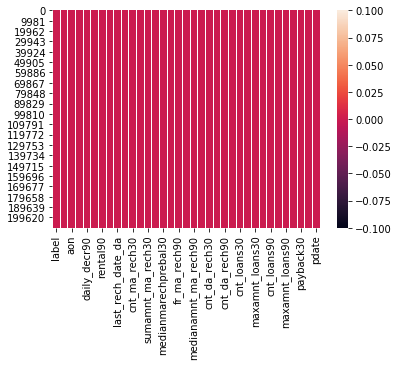

In [11]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is empty(Null Values).

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [12]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

#### Checking Uniqueness in the data :

In [13]:
df['maxamnt_loans30'].unique()

array([6.00000000e+00, 1.20000000e+01, 0.00000000e+00, ...,
       9.28645017e+04, 5.42592657e+04, 9.69272433e+04])

In [14]:
df['maxamnt_loans90'].unique()

array([ 6, 12,  0])

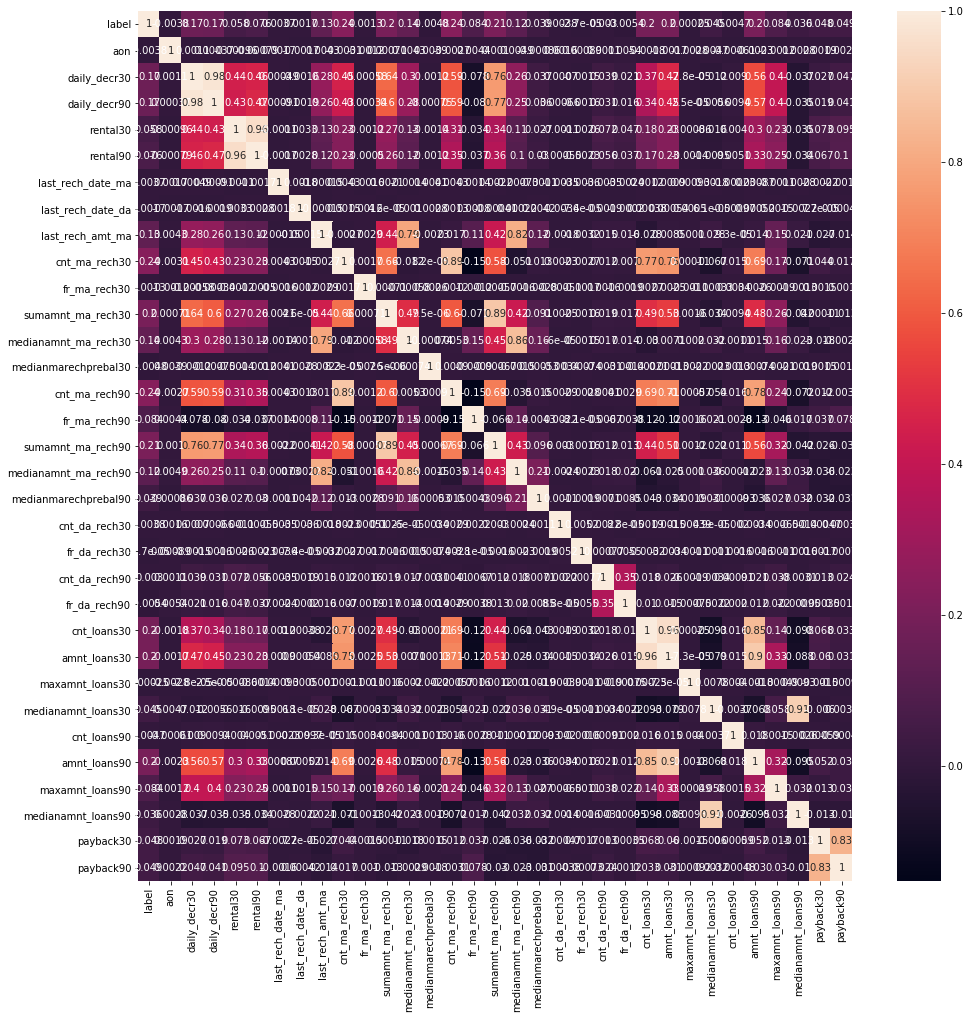

In [15]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

With the help of the above graph we will be able to see if the x variables are correlating with the y or targeted variable or not.  It has been represented by a heat map with numbering from 1 to -1 where 1 represents high correlation and -1 represents the least correlation between the variables.

In order to get more clarity of the above data it has been represented via correlation matrix which is sorting values in descending order that is :


In [16]:
corr_matrix = df.corr()
print(corr_matrix["label"].sort_values(ascending=False))

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

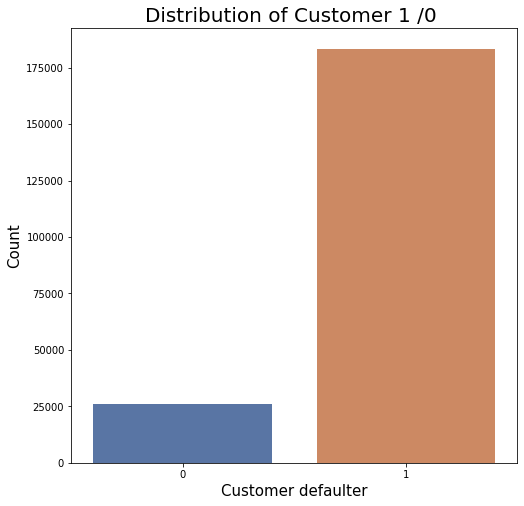

In [17]:
#Data distribution of the Target Variable before removing outliers:
plt.figure(figsize=(8,8))
sns.countplot(x = df.label,palette='deep')
plt.xlabel('Customer defaulter', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Customer 1 /0 ",fontsize= 20)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5fdb06ed0>,
      dtype=object)

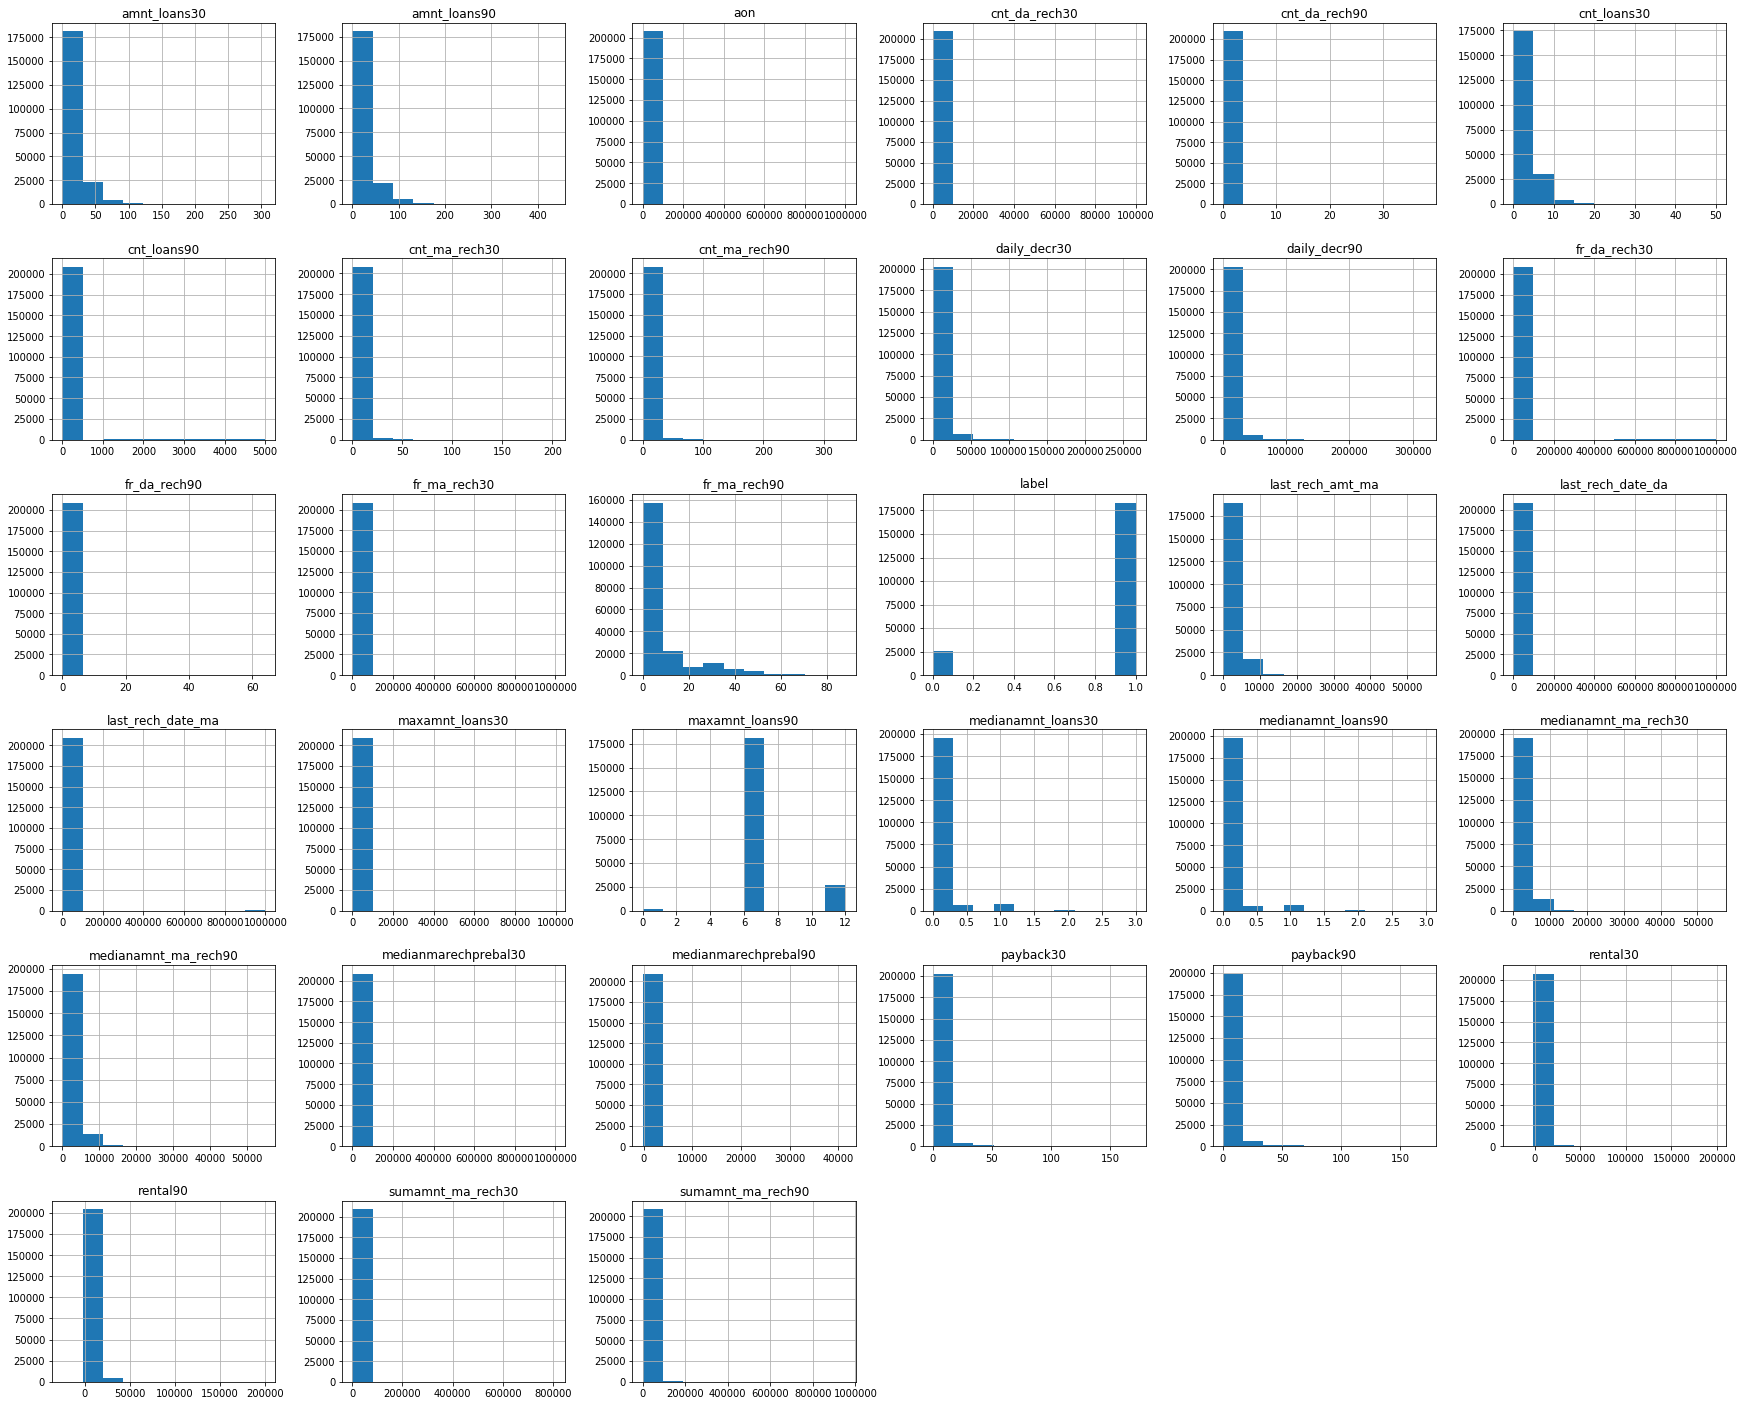

In [18]:
df.hist(figsize=(30,25))

In [19]:
#group wise dtypes:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90',
        'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90',
        'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'],
       dtype='object'),
 dtype('float64'): Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
        'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30',
        'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
        'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
        'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
        'medianamnt_loans90', 'payback30', 'payback90'],
       dtype='object'),
 dtype('<M8[ns]'): Index(['pdate'], dtype='object'),
 dtype('O'): Index(['msisdn'], dtype='object')}

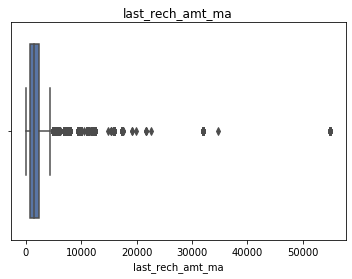

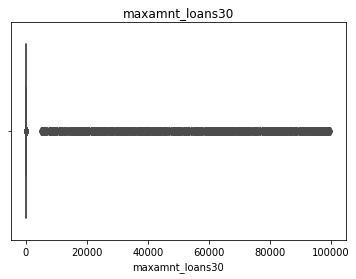

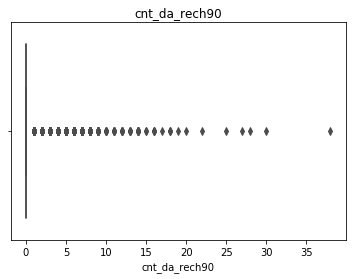

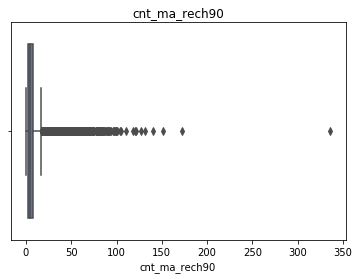

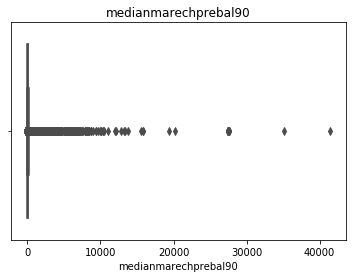

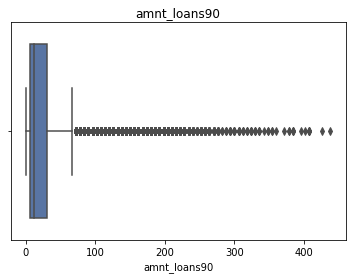

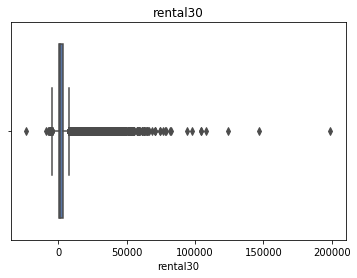

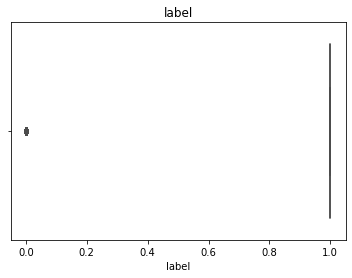

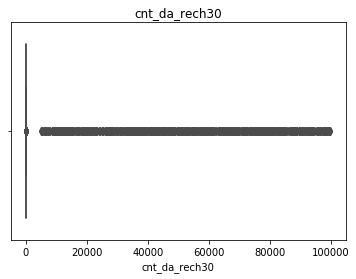

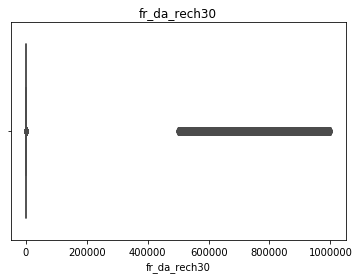

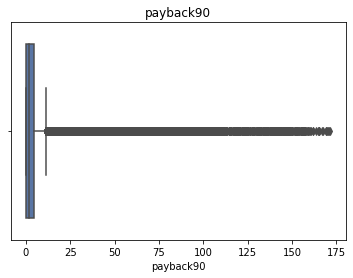

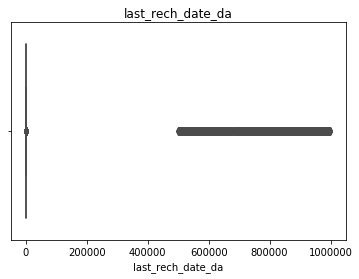

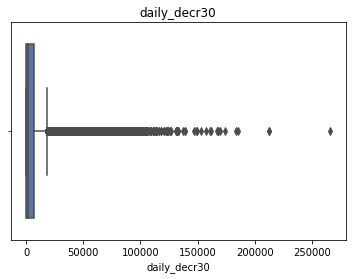

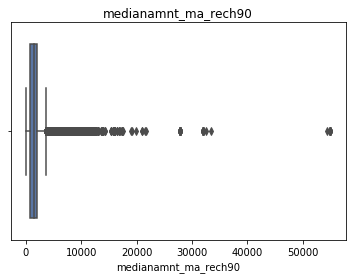

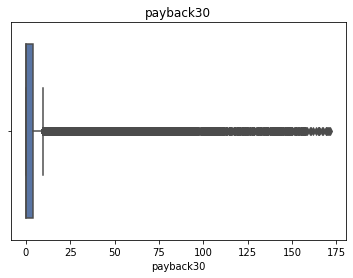

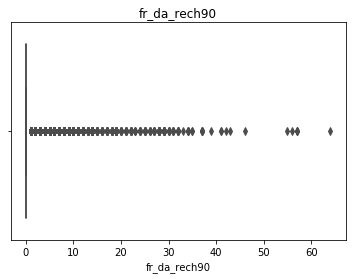

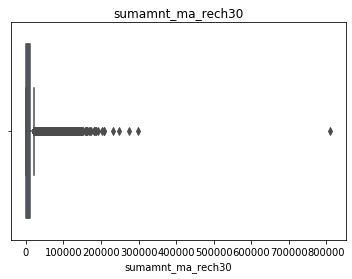

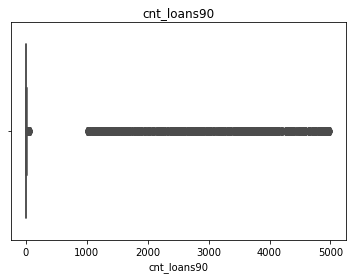

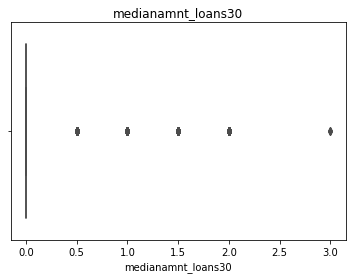

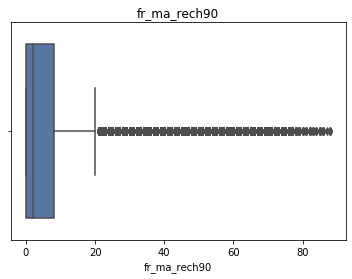

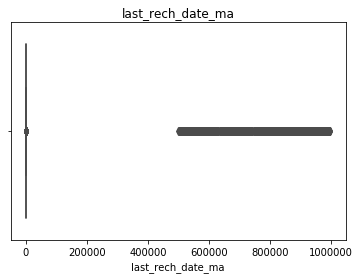

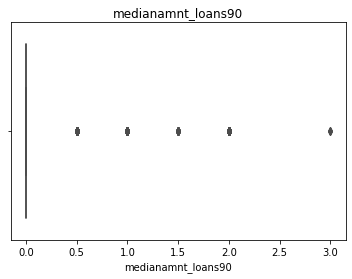

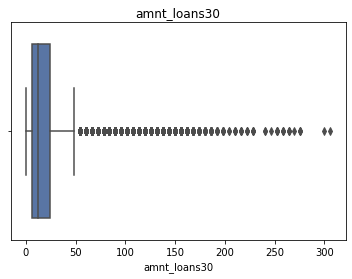

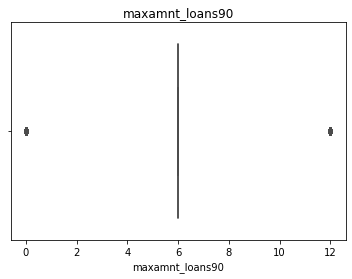

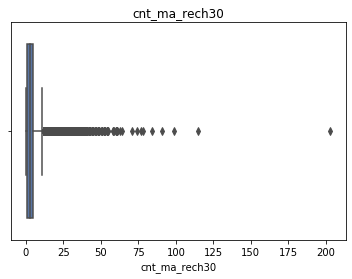

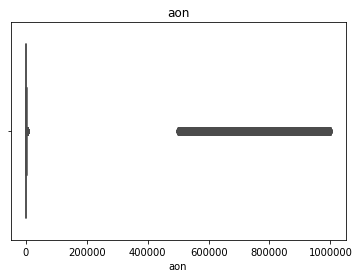

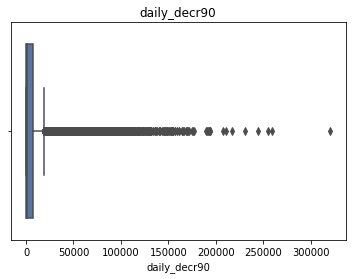

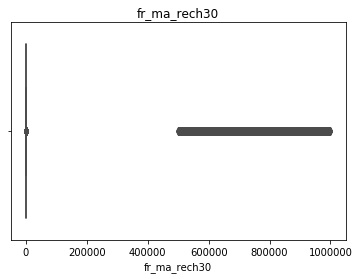

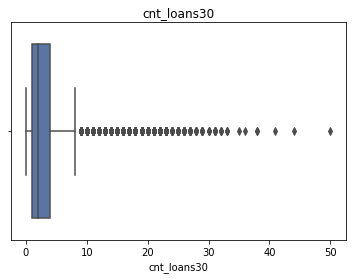

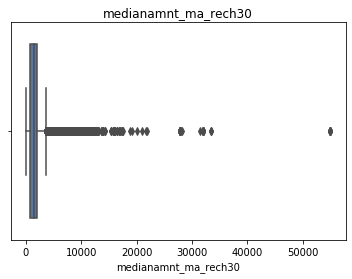

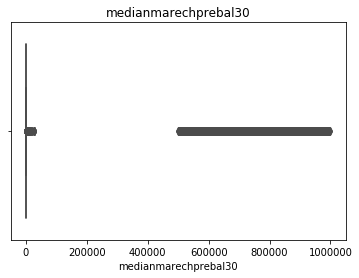

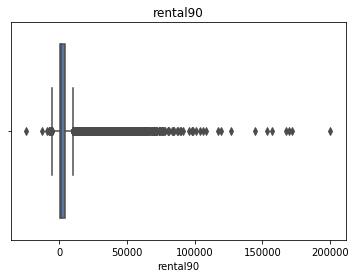

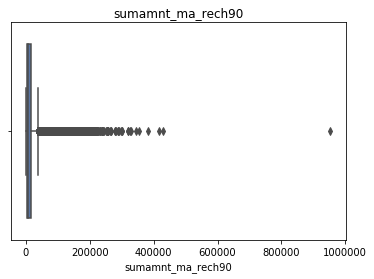

In [20]:
columns={'label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90',
        'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90',
        'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90','aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
        'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30',
        'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
        'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
        'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
        'medianamnt_loans90', 'payback30', 'payback90'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

Removing Outliers from the data:  The plot boxes situated below are representing the minimum value , maximum value and showing the mean value for the variables. In most  of the variables. The graph shows some pointers above or below the graph which is used to detect if there are any outliers present in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.Outliers here are the observations that we find at the abnormal distance from other values.


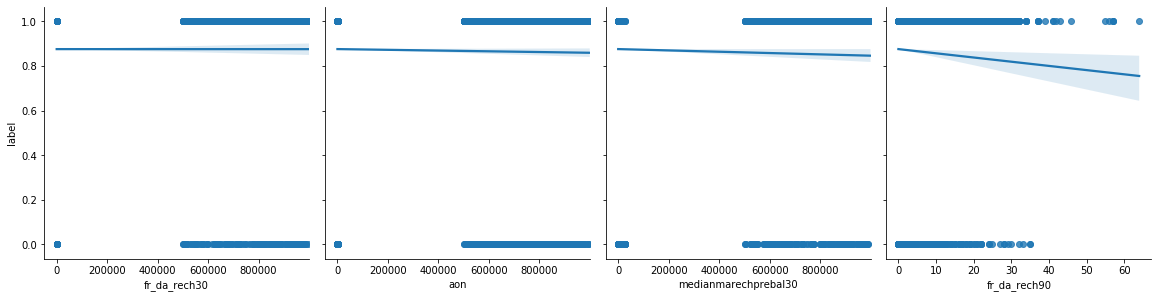

In [21]:
sns.pairplot(df, x_vars=['fr_da_rech30','aon','medianmarechprebal30','fr_da_rech90'], y_vars='label', size=4, aspect=1, kind='reg')

it is derived that the 4 features are having somewhat negativity in correlation thus we will still be taking them into consideration as we could not lose more data.

In [22]:
#making seperate columns of year, month and day:
df['year'] = pd.DatetimeIndex(df['pdate']).year
df['month'] = pd.DatetimeIndex(df['pdate']).month
df['Day'] = pd.DatetimeIndex(df['pdate']).day
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,year,month,Day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,2016,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,2016,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,2016,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,2016,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,2016,6,22


In [23]:
# Dropping pdate and year columns as they are of no use now.
df.drop("pdate", axis=1,inplace=True)
df.drop("year", axis=1,inplace=True)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,Day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [24]:
def dis_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 50)
    plt.show()

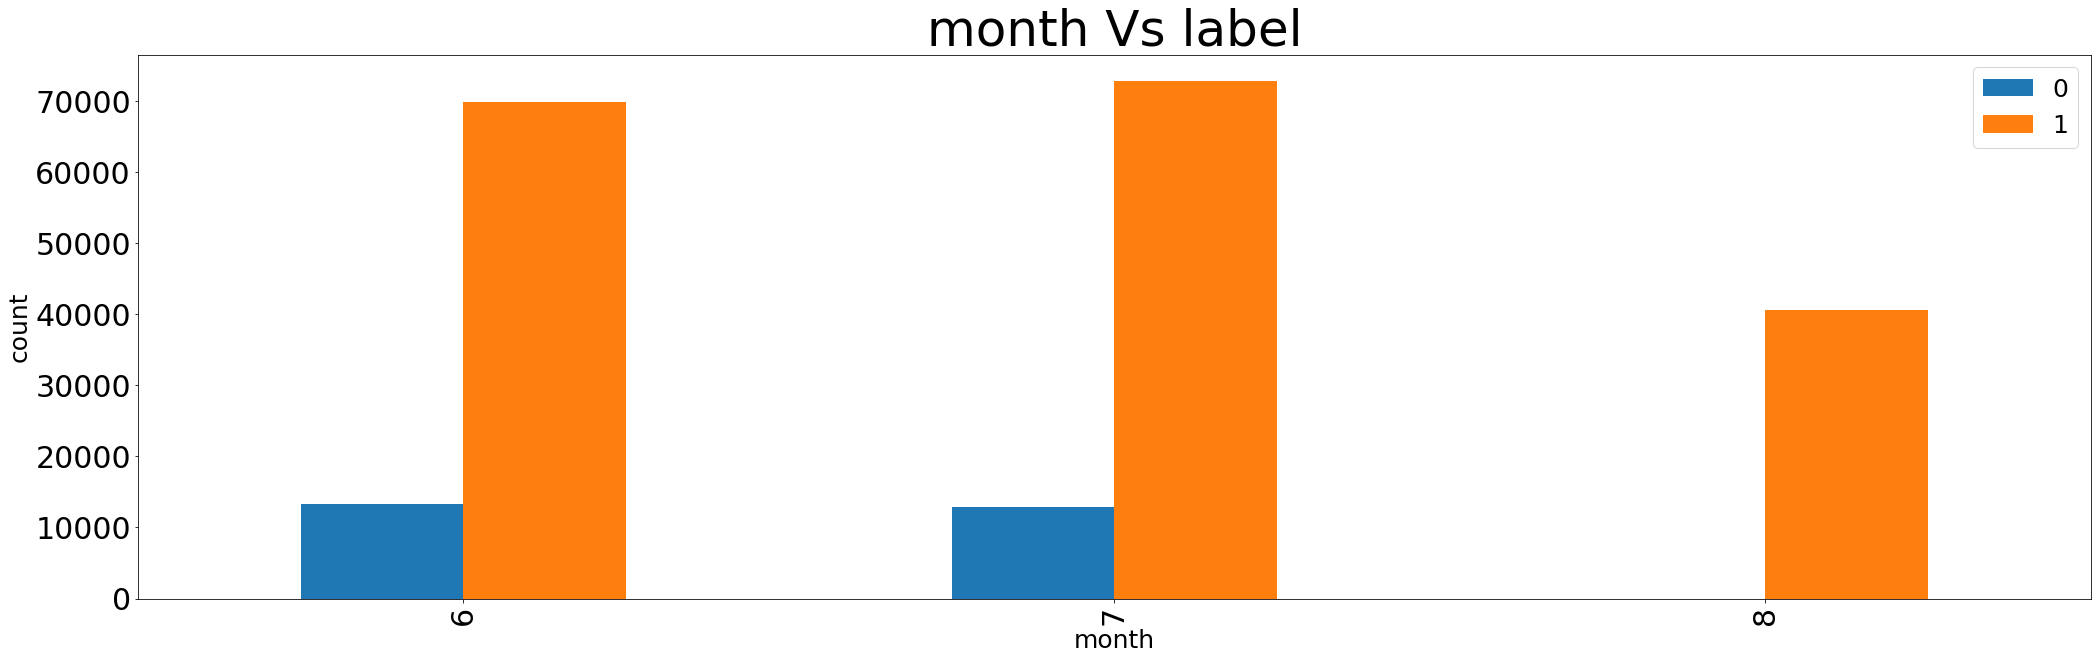

In [25]:
dis_bar('month','label')

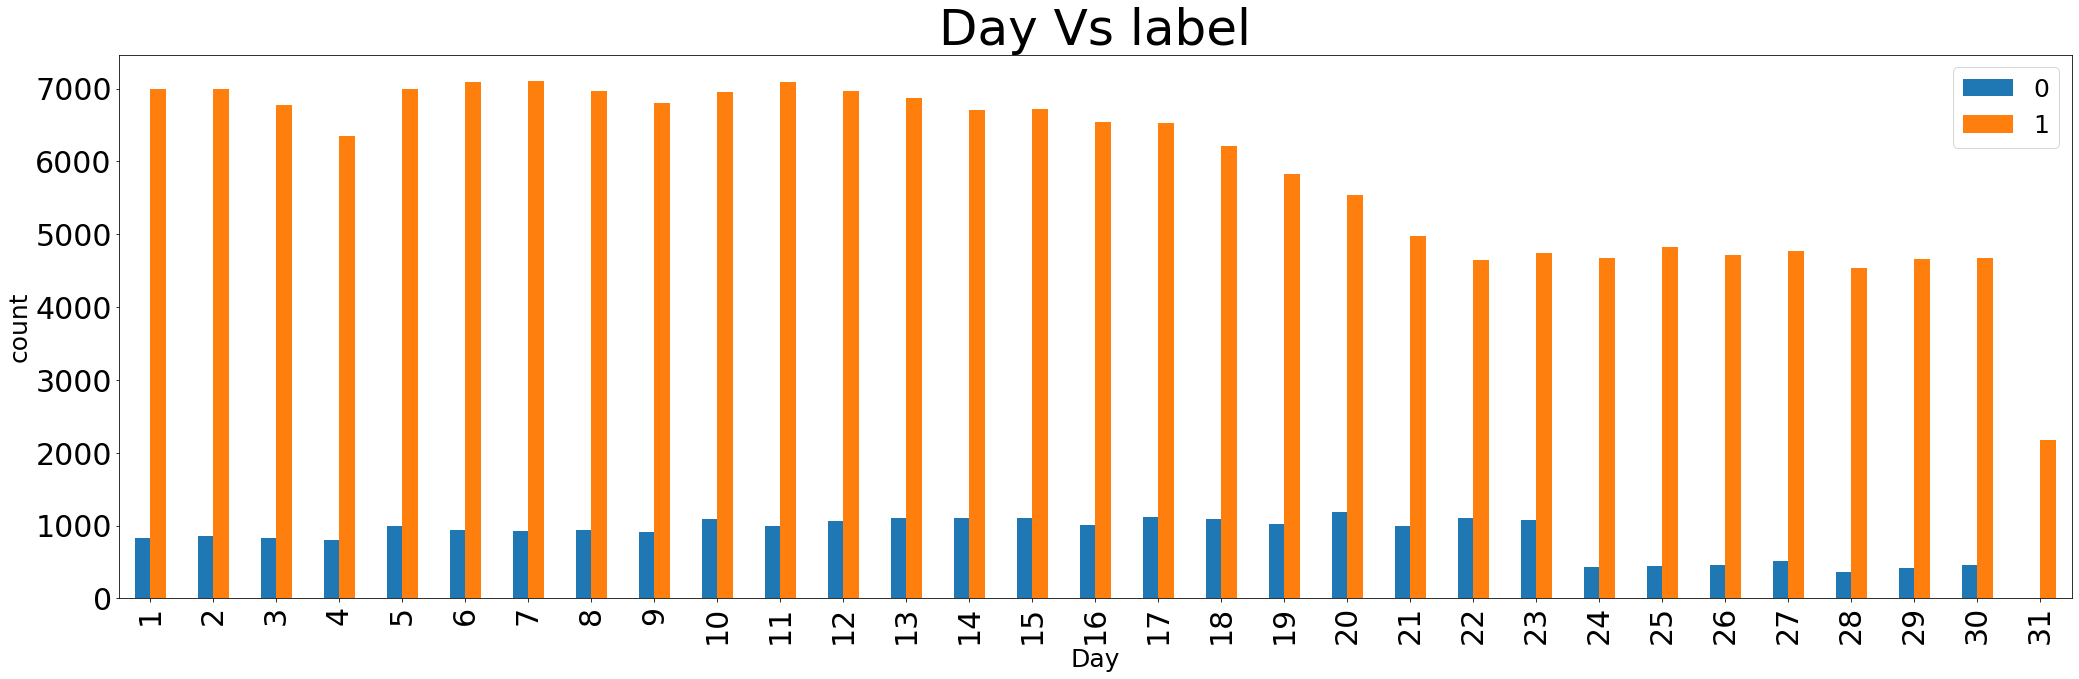

In [26]:
dis_bar('Day','label')

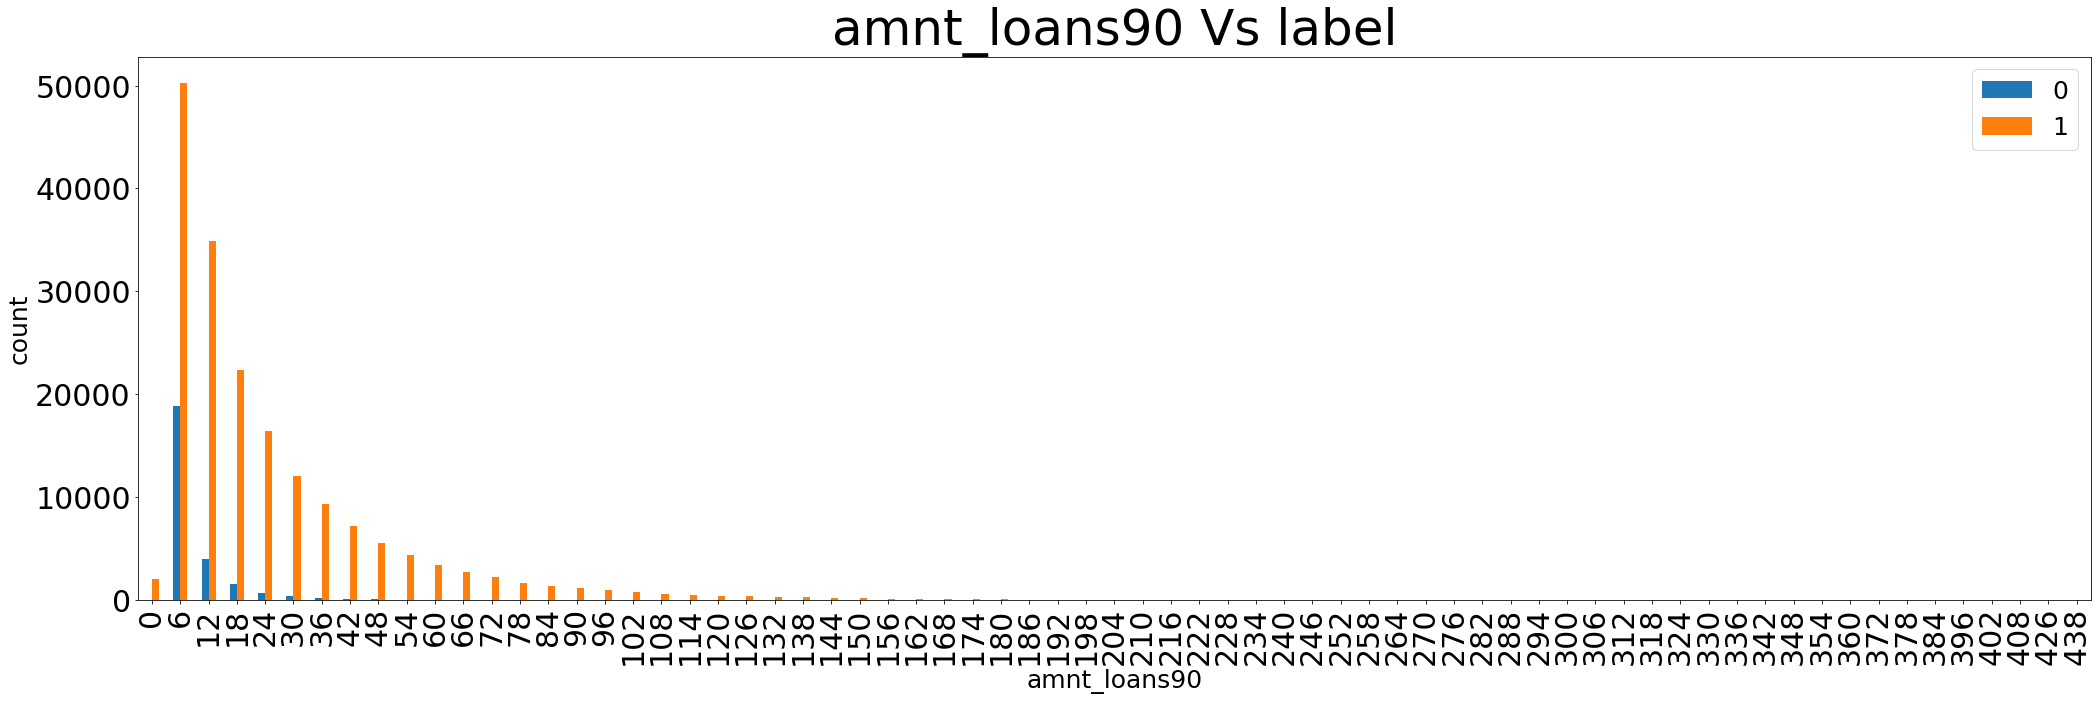

In [27]:
dis_bar('amnt_loans90','label')

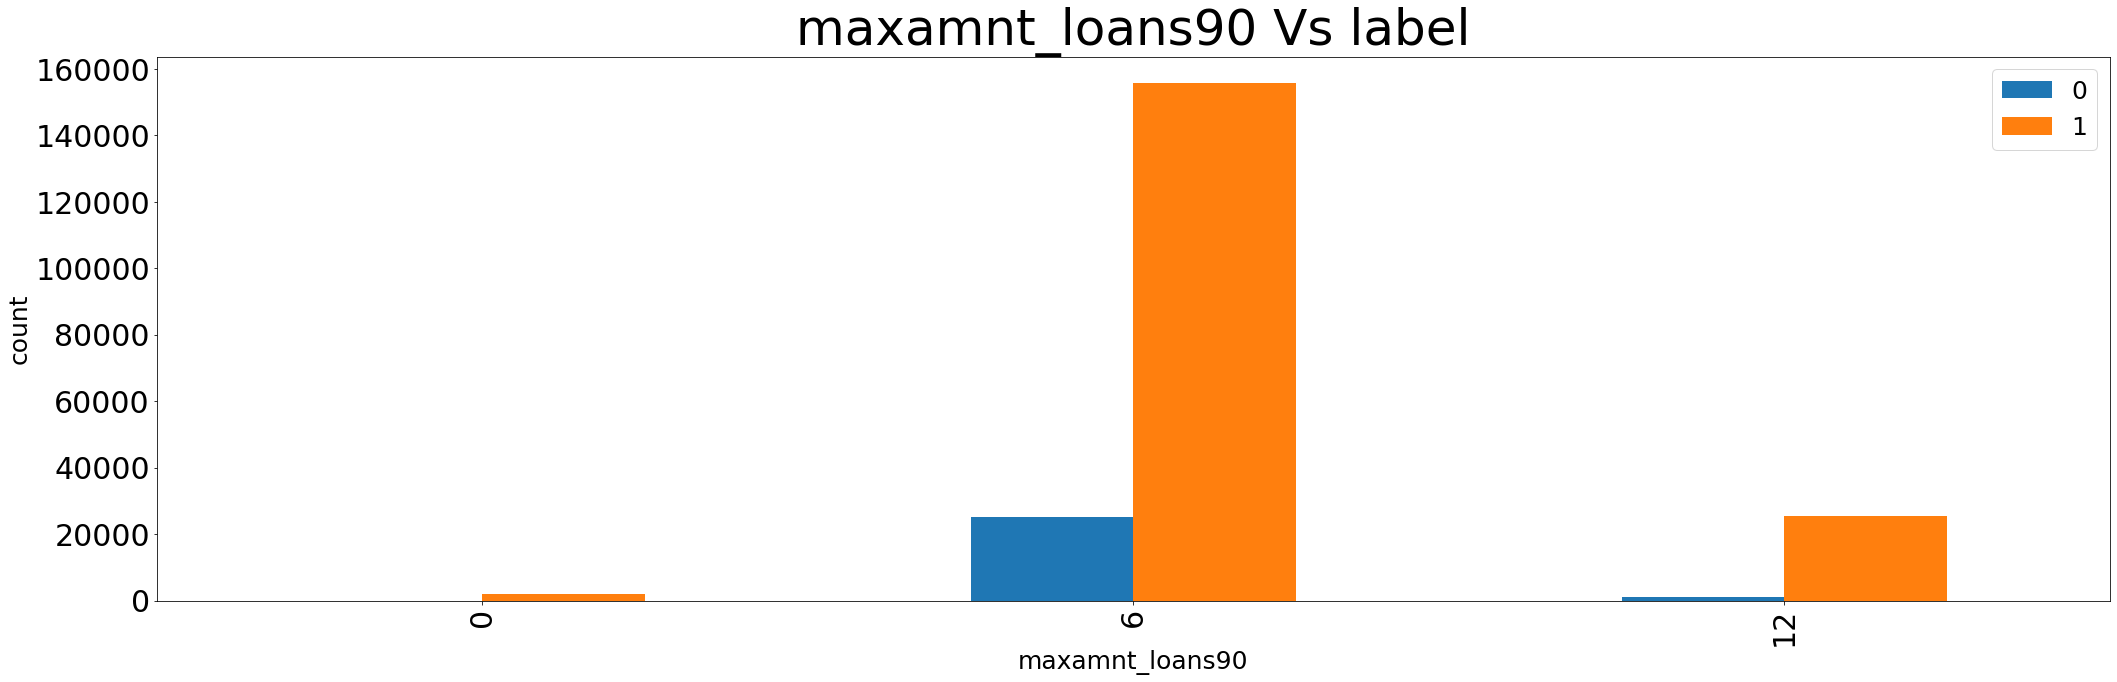

In [28]:
dis_bar('maxamnt_loans90','label')

Text(0.5, 1.0, 'maxamnt_loans90 VS payback90')

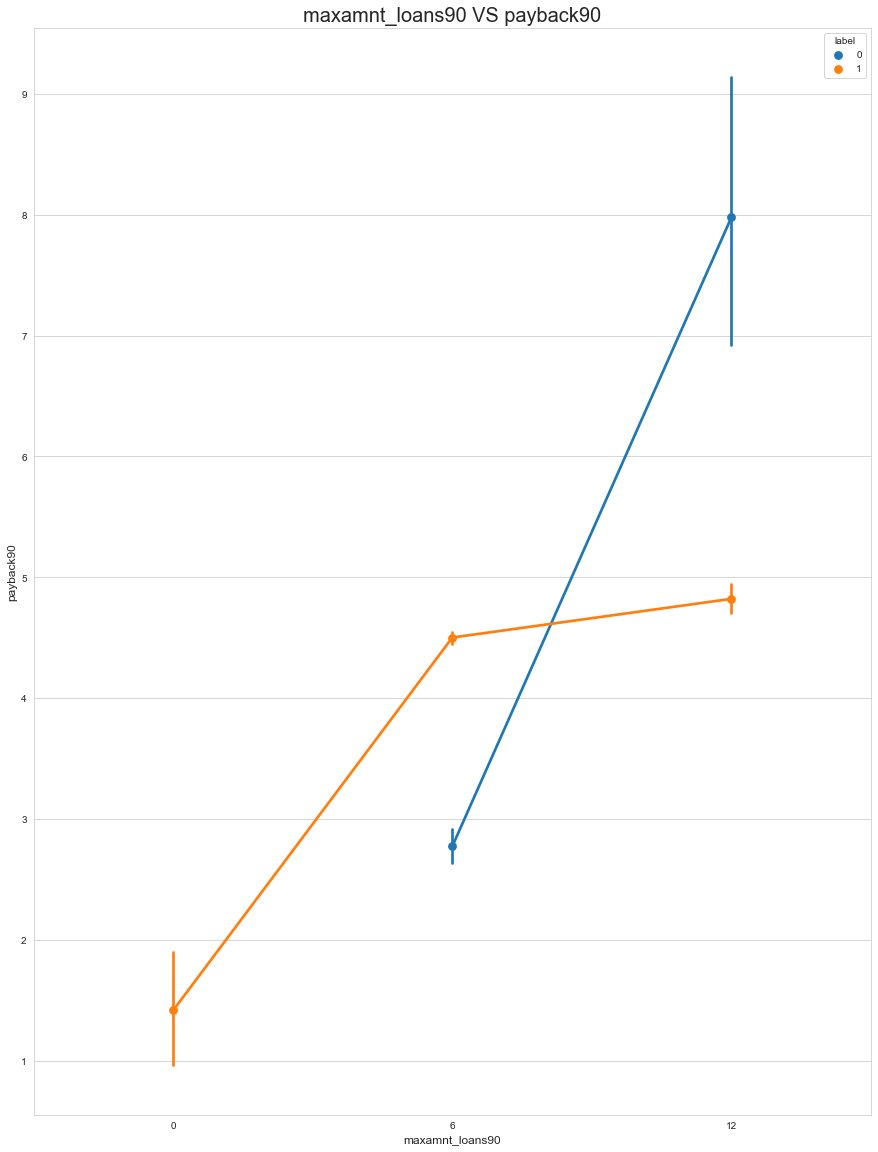

In [29]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='maxamnt_loans90', y='payback90', data=df, hue='label',join=True)
plt.xlabel('maxamnt_loans90',{'fontsize' : 'large'})
plt.ylabel('payback90',{'fontsize':'large'})
plt.title("maxamnt_loans90 VS payback90",{'fontsize':20})

Under the non defaulters we could see that as there is an increase in the maximum loan amount of last 90 days is there is an increase in the payback time 
Non-defaulters are taking less than 6 days to do the payment where the customers who have done the payment they are paying back in 6 days or above.


Text(0.5, 1.0, 'maxamnt_loans90 VS aon')

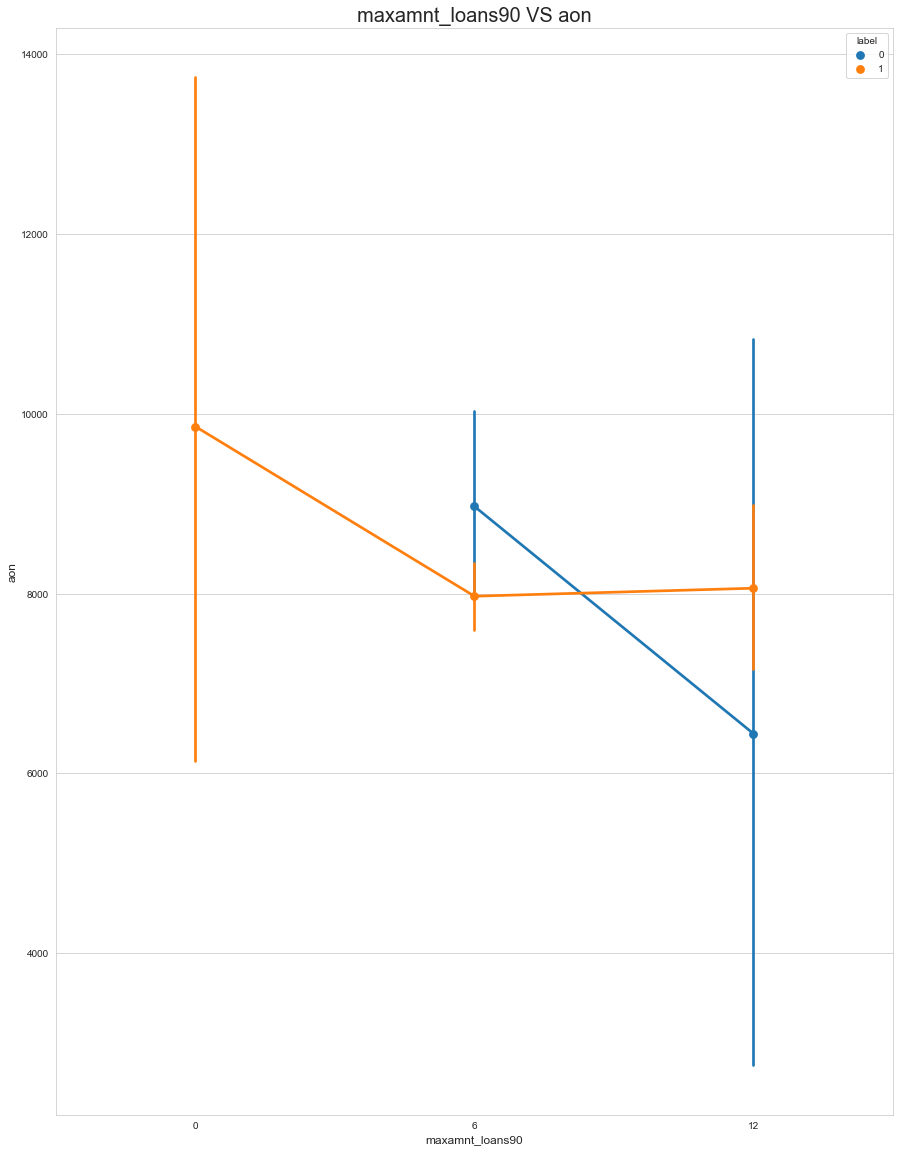

In [30]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='maxamnt_loans90', y='aon', data=df, hue='label',join=True)
plt.xlabel('maxamnt_loans90',{'fontsize' : 'large'})
plt.ylabel('aon',{'fontsize':'large'})
plt.title("maxamnt_loans90 VS aon",{'fontsize':20})

If we see the relation between the aon (age on cellular network in days) and maximum amount of loan in 90 days mostly above 6000 or 8000 days whatever the loan amount is it has been paid back that is they are non defaulters on the other hand mostly below 6000 of aon  people are defaulting in the payment of the loans. There may be few defaulters ranging in between 8000 to 10000 but they will be negligible, so Statistically with respect to aon we could identify the customers who will be able to repay their loan amount.

In [31]:
# dropping the phone number column which is the object datatype and it is of no use in the prediction of the dataset.
df.drop("msisdn", axis=1,inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [32]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)


(209593, 35)


In [33]:
df1=df.loc[(z_score<4.5).all(axis=1)]
print(df1.shape)


(181809, 35)


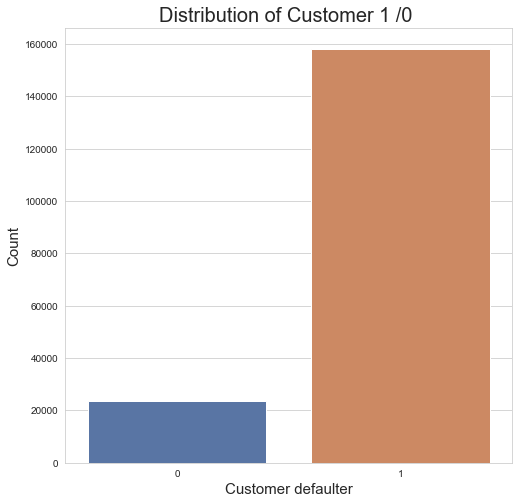

In [34]:
#Data distribution of the Target Variable After removing outliers:
plt.figure(figsize=(8,8))
sns.countplot(x = df1.label,palette='deep')
plt.xlabel('Customer defaulter', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Customer 1 /0 ",fontsize= 20)
plt.show()

After treating the dataset with z score in order to remove the outliers present in our dataset we have successfully removed almost less than 10% of the data from the original dataset, without disturbing the distribution of the Target variable which is same as before represented through the graph above. 

### Assigning X AND Y Variables:

In [35]:
x=df1.iloc[:,1:36]
x.shape
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,Day
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [36]:
y=df1.iloc[:,0:1]
y.shape
y

,label
0,0
1,1
2,1
3,1
4,1
...,...
209588,1
209589,1
209590,1
209591,1


### Standard Scaler:

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_x_scaler = scaler.transform(x)
x = pd.DataFrame(df1_x_scaler)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.762002,-0.220336,-0.255724,-0.632985,-0.619099,-0.416105,-0.120915,-0.196640,-0.490798,3.126518,...,-0.026700,-0.187631,-0.176033,-0.471263,-0.311838,-0.168699,5.242416,4.270236,0.312221,0.667999
1,0.120680,1.079816,0.866223,0.395366,0.150043,1.467076,-0.120915,1.853955,-0.773736,-0.722894,...,-0.009341,-0.187631,-0.288953,-0.471263,2.658192,-0.168699,-0.569869,-0.595511,1.673221,-0.515448
2,-0.234399,-0.457948,-0.462185,-0.431529,-0.475633,-0.311483,-0.120915,-0.196640,-0.773736,-0.722894,...,-0.026700,-0.187631,-0.288953,-0.750711,-0.311838,-0.168699,-0.569869,-0.595511,1.673221,0.549654
3,-0.824191,-0.655370,-0.632685,-0.650971,-0.641675,3.664120,-0.120915,-0.482410,-1.056674,-0.722894,...,-0.026700,-0.187631,-0.176033,-0.471263,-0.311838,-0.168699,-0.569869,-0.595511,-1.048779,-0.988826
4,0.592112,-0.636816,-0.616661,-0.372642,-0.431076,-0.206862,-0.120915,0.175055,0.923891,-0.356283,...,-0.026700,-0.187631,0.388568,0.925980,-0.311838,-0.168699,-0.102214,-0.204014,-1.048779,0.904688


In [38]:
x.shape

(181809, 34)

### Model Testing:
Logistic Regression

Gaussian NB

Decision Tree Classifier




In [39]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [40]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(145447, 34) (36362, 34)
(145447, 1) (36362, 1)


In [41]:
LOR=LogisticRegression()
GNB=GaussianNB()
DTC=DecisionTreeClassifier(random_state=10)

In [42]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('DecisionTreeClassifier',DTC))

**************** LogisticRegression ****************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY SCORE IS =  0.8724767614542654


CROSS_VAL_SCORE =  0.8729105812236797


ROC_AUC_SCORE =  0.5346550070760028


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.55      0.08      0.14      4707
           1       0.88      0.99      0.93     31655

    accuracy                           0.87     36362
   macro avg       0.72      0.53      0.53     36362
weighted avg       0.84      0.87      0.83     36362



CONFUSION MATRIX [[  371  4336]
 [  301 31354]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


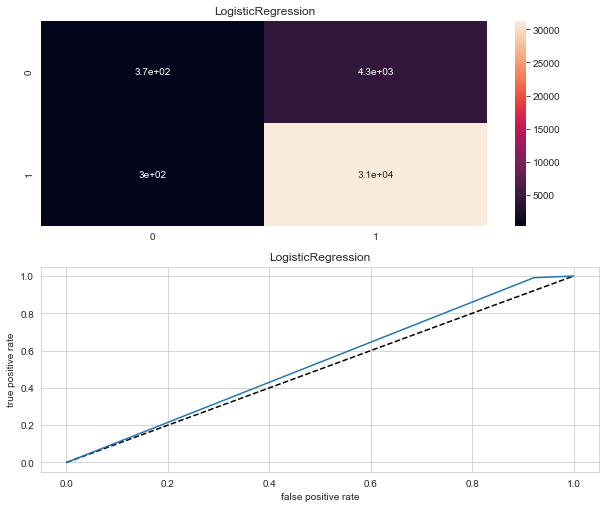




**************** GaussianNB ****************


GaussianNB(priors=None, var_smoothing=1e-09)


ACCURACY SCORE IS =  0.6287332929981849


CROSS_VAL_SCORE =  0.6258601098270544


ROC_AUC_SCORE =  0.7208404545541032


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.24      0.85      0.37      4707
           1       0.96      0.60      0.74     31655

    accuracy                           0.63     36362
   macro avg       0.60      0.72      0.55     36362
weighted avg       0.87      0.63      0.69     36362



CONFUSION MATRIX [[ 3978   729]
 [12771 18884]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


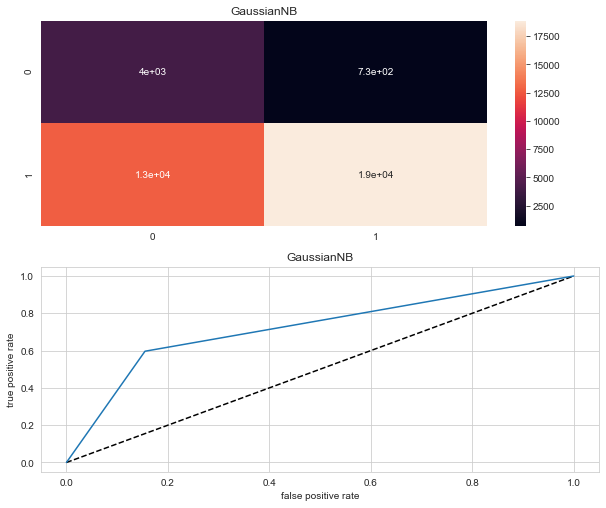




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


ACCURACY SCORE IS =  0.8823772069743139


CROSS_VAL_SCORE =  0.8839496596653781


ROC_AUC_SCORE =  0.7476961070189996


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.54      0.57      0.55      4707
           1       0.94      0.93      0.93     31655

    accuracy                           0.88     36362
   macro avg       0.74      0.75      0.74     36362
weighted avg       0.88      0.88      0.88     36362



CONFUSION MATRIX [[ 2664  2043]
 [ 22

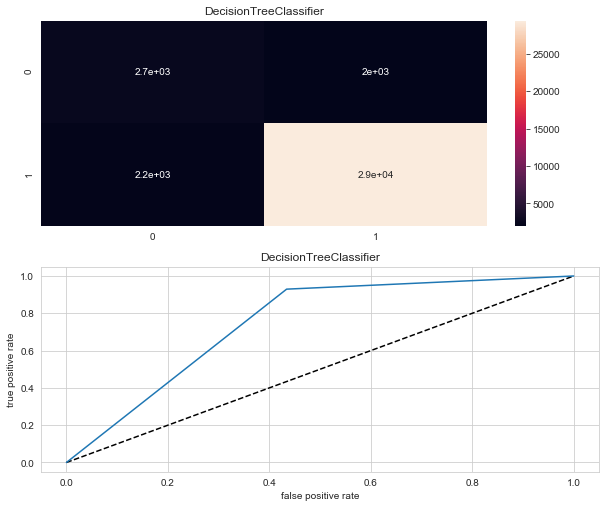

In [43]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

### Results:

In [44]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,87.247676,87.291058,53.465501
1,GaussianNB,62.873329,62.586011,72.084045
2,DecisionTreeClassifier,88.237721,88.394966,74.769611


In [45]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor(bootstrap=True,max_features='auto',min_samples_split=2,n_estimators=300)
rr.fit(x_train, y_train)
rr.score(x_train,y_train)

0.9288292561172078

In [46]:
pred=rr.predict(x_test)

In [47]:
from math import sqrt
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred)))
print("R-squared: ", r2_score(y_test,pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.24341623892303912
R-squared:  0.47421510622726804


In [48]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8895825312139046
[[ 1520  3187]
 [  828 30827]]
              precision    recall  f1-score   support

           0       0.65      0.32      0.43      4707
           1       0.91      0.97      0.94     31655

    accuracy                           0.89     36362
   macro avg       0.78      0.65      0.68     36362
weighted avg       0.87      0.89      0.87     36362



In [49]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN.score(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.877756999064958
[[ 1870  2837]
 [ 1608 30047]]
              precision    recall  f1-score   support

           0       0.54      0.40      0.46      4707
           1       0.91      0.95      0.93     31655

    accuracy                           0.88     36362
   macro avg       0.73      0.67      0.69     36362
weighted avg       0.87      0.88      0.87     36362



In [50]:
# base estimator = Decision tree Classifier
from sklearn.ensemble import AdaBoostClassifier
ADA=AdaBoostClassifier(n_estimators=100)
ADA.fit(x_train,y_train)
ADA.score(x_train,y_train)
predADA=ADA.predict(x_test)
print(accuracy_score(y_test,predADA))
print(confusion_matrix(y_test,predADA))
print(classification_report(y_test,predADA))

0.9114460150706781
[[ 2053  2654]
 [  566 31089]]
              precision    recall  f1-score   support

           0       0.78      0.44      0.56      4707
           1       0.92      0.98      0.95     31655

    accuracy                           0.91     36362
   macro avg       0.85      0.71      0.76     36362
weighted avg       0.90      0.91      0.90     36362



In [51]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
R_forest= RandomForestClassifier(n_estimators =200, random_state=52)
modelR= R_forest.fit(x_train, y_train)

# Predictions
pred_2 = modelR.predict(x_test)

print ("The accuracy of RandomForestClassifier : ",accuracy_score(y_test, pred_2))
print ("The f1 score of RandomForestClassifier : ", f1_score(y_test, pred_2, average = 'binary'))

print(accuracy_score(y_test,pred_2))
print(confusion_matrix(y_test,pred_2))
print(classification_report(y_test,pred_2))

The accuracy of RandomForestClassifier :  0.9193938727242726
The f1 score of RandomForestClassifier :  0.9548138441378248
0.9193938727242726
[[ 2464  2243]
 [  688 30967]]
              precision    recall  f1-score   support

           0       0.78      0.52      0.63      4707
           1       0.93      0.98      0.95     31655

    accuracy                           0.92     36362
   macro avg       0.86      0.75      0.79     36362
weighted avg       0.91      0.92      0.91     36362



In [53]:
#Cross val score :
print("Mean accuracy for R_forest classifier ",cross_val_score(R_forest,x,y,cv=5,scoring="accuracy").mean())
print("Standard Deviation accuracy for R_forst classifier ",cross_val_score(R_forest,x,y,cv=5,scoring="accuracy").std())
print()
print()
print("Mean accuracy score for AdaBoostClassifier ",cross_val_score(ADA,x,y,cv=5,scoring="accuracy").mean())
print("Standard Deviation accuracy for AdaBoostClassifier ",cross_val_score(ADA,x,y,cv=5,scoring="accuracy").std())
print()
print()
print("Mean accuracy for KNeighborsClassifier ",cross_val_score(KNN,x,y,cv=5,scoring="accuracy").mean())
print("Standard Deviation accuracy for KNeighborsClassifier ",cross_val_score(KNN,x,y,cv=5,scoring="accuracy").std())
print()
print()
print("Mean  for RandomForestRegressor ",cross_val_score(rr,x,y,cv=3).mean())
print("Standard Deviation  for RandomForestRegressor ",cross_val_score(rr,x,y,cv=3).std())
print()
print()
print("Mean accuracy score for SVC ",cross_val_score(svc,x,y,cv=5,scoring="accuracy").mean())
print("Standard Deviation accuracy score for SVC ",cross_val_score(svc,x,y,cv=5,scoring="accuracy").std())



Mean accuracy for R_forest classifier  0.9205814890228131
Standard Deviation accuracy for R_forst classifier  0.0008346210821255956


Mean accuracy score for AdaBoostClassifier  0.9109284997305641
Standard Deviation accuracy for AdaBoostClassifier  0.000956140392480773


Mean accuracy for KNeighborsClassifier  0.8789883833323419
Standard Deviation accuracy for KNeighborsClassifier  0.0010546854077406486


Mean  for RandomForestRegressor  0.47746949656727705
Standard Deviation  for RandomForestRegressor  0.003463055951873779


Mean accuracy score for SVC  0.8889713970051287
Standard Deviation accuracy score for SVC  0.001246933494322397


# Choosing a Model:

Most of the above result shows the accuracy score above 85% where the maximum accuracy score is for random forest regressor 92.88% but the cross val score of the model is very low that is 47,74 and test result for this model is : Root mean squared error : 0.24341623892303912 , where r -squared is = 0.47421510622726804.
AdaBoost Classifier is performing good with 91% and cross val score is also around 91% but if we compare it with Random forest Classifier then this model is not up to the mark. Random forest classifier result in the best output : 


The accuracy of RandomForestClassifier :  0.9193938727242726

The f1 score of RandomForestClassifier :  0.9548138441378248

0.9193938727242726

[[ 2464  2243]
 [  688 30967]]
 
              precision    recall  f1-score   support

           0       0.78      0.52      0.63      4707
           1       0.93      0.98      0.95     31655

    accuracy                           0.92     36362
   macro avg       0.86      0.75      0.79     36362
weighted avg       0.91      0.92      0.91     36362

The F1 Score is the 2*((precision*recall)/(precision+recall)). It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall which is showing more than 95% 
Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. ... In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on. 
Hence I am choosing Random Forest Classifier to be my best model in order to predict the target variable.


In [54]:
from sklearn.externals import joblib

In [55]:
joblib.dump(R_forest,'Micro_Credit_Defaulter_Project.obj')

['Micro_Credit_Defaulter_Project.obj']

In [56]:
#loading back the model:
model=joblib.load('Micro_Credit_Defaulter_Project.obj')

In [57]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=52, verbose=0,
                       warm_start=False)

In [59]:
#Pridicting x_test Random Forest Classifier = R_forest
R_forest.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])